In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


# Severity Levels of the accident

<AxesSubplot:xlabel='Severity', ylabel='count'>

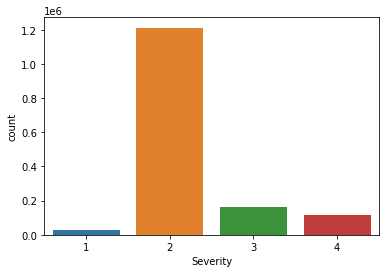

In [17]:
sns.countplot(x = 'Severity',data=df)

- on the scale of 1-4 Most of the accidents are Severity Level 2

# Accident Distribution by States

Text(0.5, 1.0, 'Accidents Distribution By States')

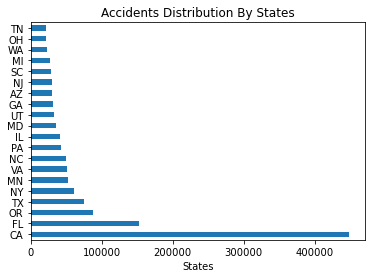

In [7]:
Bystate = df['State'].value_counts()
fig, ax = plt.subplots()
Bystate[:20].plot(kind='barh')

plt.xlabel("States")
plt.title('Accidents Distribution By States')

- California has the highest number of Accidents

# Accident Distribution by Time

In [8]:
#Creating Datetime object
df['timeStamp'] = pd.to_datetime(df['Start_Time'])
#using Datetime object to create time specific coloum
df['Hour'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)
df['Day of week'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.month)

Text(0.5, 1.0, 'Number of Accident Distribution by Time of the day')

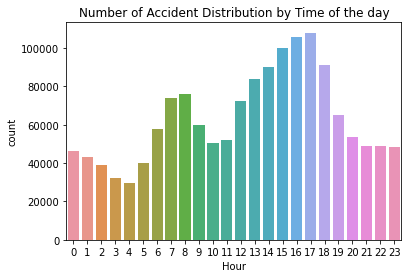

In [9]:
sns.countplot(x='Hour',data=df)

plt.title('Number of Accident Distribution by Time of the day')

- The rate of Accident increase significantly at 5-8  and 12-17 due to high traffic

In [10]:
#Make day of week to be easy to read
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of week'] = df['Day of week'].map(dmap)

Text(0.5, 1.0, 'Number of Accident Distribution by Day of the week')

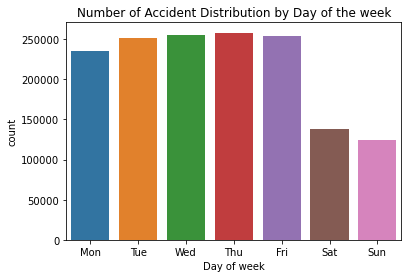

In [11]:
sns.countplot(x='Day of week',data=df)

plt.title('Number of Accident Distribution by Day of the week')

- Accident rate on the weekend decrease significantly due to low traffic

In [12]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,timeStamp,Hour,Day of week,Month
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2016-02-08 00:37:08,0,Mon,2
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2016-02-08 05:56:20,5,Mon,2
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2016-02-08 06:15:39,6,Mon,2
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2016-02-08 06:15:39,6,Mon,2
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,Night,Night,Day,Day,2016-02-08 06:51:45,6,Mon,2


Text(0.5, 1.0, 'Number of Accident Distribution by Month')

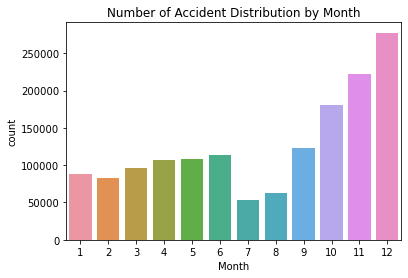

In [13]:
sns.countplot(x='Month',data=df)

plt.title('Number of Accident Distribution by Month')

- The rate of the accident increse significantly during Winter(September - December)

# Accident Distribution by Cities

In [14]:
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,timeStamp,Hour,Day of week,Month
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2016-02-08 00:37:08,0,Mon,2
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2016-02-08 05:56:20,5,Mon,2
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2016-02-08 06:15:39,6,Mon,2


In [15]:
df['City'].value_counts()

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

Text(0.5, 1.0, 'Top 20 Cities that has the highest number of Accident')

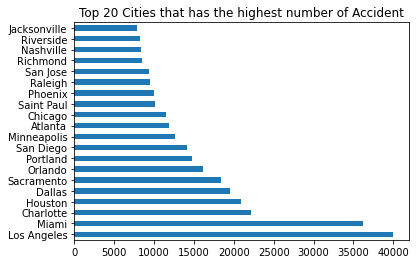

In [16]:
ByCity = df['City'].value_counts()
fig, ax = plt.subplots()
ByCity[:20].plot(kind='barh')
plt.title('Top 20 Cities that has the highest number of Accident')

- Los Angeles has the highest number of Accident

# Conclusion
- The rate of the accident increse significantly during Winter(September - December)
- Los Angeles has the highest number of Accident
- Accident rate on the weekend decrease significantly due to low traffic
- Accident rate increase significantly at 5-8 and 12-17 due to high traffic
- California has the highest number of Accidents
- on the scale of 1-4 Most of the accidents are Severity Level 2

# Future Improvements
- Yearly Trend of The Accident
- Location that the Accident are likely to occour
- Use Deep Learning to Predict where the Accident might occour